<a href="https://colab.research.google.com/github/MuhammadShavaiz/Clothes-Music-Generator/blob/main/Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing dependencies

In [ ]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets
import tensorflow as tf
# Check if GPU is available
device = tf.device("/gpu:0" if tf.config.list_physical_devices('GPU') else "/cpu")

In [ ]:
# Importing datasets
import tensorflow_datasets as tfds

In [ ]:
# Importing matplotlib for visulalizing
from matplotlib import pyplot as plt

In [ ]:
# Bring in datasource
dataset = tfds.load('fashion_mnist', split = 'train')

#VISUALIZE DATA AND BUILD DATASET

In [ ]:
import numpy as np

In [ ]:
# Getting data out of pipeline
dataiterator = dataset.as_numpy_iterator()

In [ ]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [181],
        [186],
        [188],
        [153],
        [170],
        [202],
        [212],
        [196],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 22],
        [242],
        [180],
        [154],
        [142],
        [194],
        [214],
        [188],
        [210],
        [ 26],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 53],
      

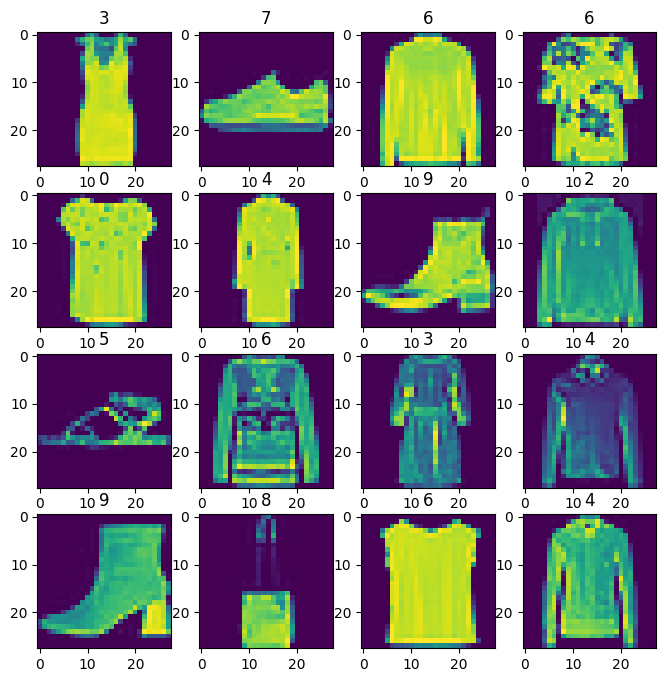

In [ ]:
# Ploting the data with labels
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (8,8))
for row in range (4):
  for col in range (4):
    batch = dataiterator.next()
    ax[row, col].imshow(np.squeeze(batch['image']))
    ax[row, col].title.set_text(batch['label'])

In [ ]:
# Scale images function
def scale_images(data):
  image = data['image']
  return image/255

In [ ]:
# Applying transformations(mapping, caching, shuffling, batching, prefetching)
dataset = dataset.map(scale_images)
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(128)
dataset = dataset.prefetch(64)

#BUILD NEURAL NETWORK

In [19]:
# Import Modelling Components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [22]:
# Build Generator
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))



    return model

In [23]:
test_model = build_generator()

In [24]:
test_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
Total params: 809088 (3.09 MB)
Trainable params: 809088 (3.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
